In [6]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

#sys.path.append('../src')
#from ocr.helpers import implt, resize, ratio

%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 9.0)



In [5]:
!pip3 install opencv2

ERROR: Could not find a version that satisfies the requirement opencv2 (from versions: none)
ERROR: No matching distribution found for opencv2


In [4]:
IMG = "i1"    # Image name/number

# Loading images and ploting it (converting to RGB from BGR)
image = cv2.cvtColor(cv2.imread("../data/pages/%s.png" % IMG), cv2.COLOR_BGR2RGB)
implt(image)



error: OpenCV(3.4.4) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [3]:
# Python program to illustrate HoughLine 
# method for line detection 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt

# Reading the required image in 
# which operations are to be done. 
# Make sure that the image is in the same 
# directory in which this python program is 
img = cv2.imread('index.png') 

# Convert the img to grayscale 
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

# Apply edge detection method on the image 
edges = cv2.Canny(gray,50,150,apertureSize = 3) 

# This returns an array of r and theta values 
lines = cv2.HoughLines(edges,1,np.pi/180, 200) 


# The below for loop runs till r and theta values 
# are in the range of the 2d array 
for r,theta in lines[0]: 
	
	# Stores the value of cos(theta) in a 
	a = np.cos(theta) 

	# Stores the value of sin(theta) in b 
	b = np.sin(theta) 
	
	# x0 stores the value rcos(theta) 
	x0 = a*r 
	
	# y0 stores the value rsin(theta) 
	y0 = b*r 
	
	# x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
	x1 = int(x0 + 1000*(-b)) 
	
	# y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
	y1 = int(y0 + 1000*(a)) 

	# x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
	x2 = int(x0 - 1000*(-b)) 
	
	# y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
	y2 = int(y0 - 1000*(a)) 
	
	# cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
	# (0,0,255) denotes the colour of the line to be 
	#drawn. In this case, it is red. 
	cv2.line(img,(x1,y1), (x2,y2), (0,0,255),2) 
	
# All the changes made in the input image are finally 
# written on a new image houghlines.jpg 
cv2.imwrite('linesDetected.jpg', img) 
plt.imshow(img)

error: OpenCV(3.4.4) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('index.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 7)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
plt.imshow(img)

error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [8]:
import math
img = cv2.imread("index.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 80, 120)
lines = cv2.HoughLinesP(edges, 1, math.pi/2, 2, None, 30, 1);
for line in lines[0]:
    pt1 = (line[0],line[1])
    pt2 = (line[2],line[3])
    cv2.line(img, pt1, pt2, (0,0,255), 3)
cv2.imwrite("index.png", img)
plt.imshow(img)

error: OpenCV(4.1.1) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


6
[[237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 ...
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]
 [237 237 237 ... 237 237 237]]


NameError: name 'show_wait_destroy' is not defined

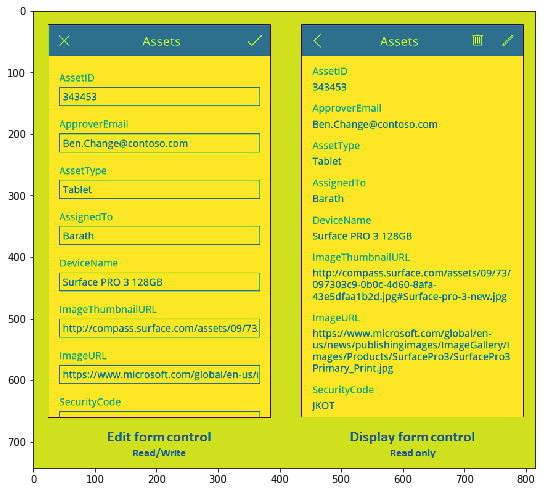

In [9]:
"""
@file morph_lines_detection.py
@brief Use morphology transformations for extracting horizontal and vertical lines sample code
"""
import numpy as np
import sys
import cv2 as cv

def image(argv):
    # [load_image]
    # Check number of arguments
    print(len(argv))
    if len(argv) < 1:
        print ('Not enough parameters')
        print ('Usage:\nmorph_lines_detection.py < path_to_image >')
        return -1
    # Load the image
    src = cv.imread(argv, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + argv[0])
        return -1
    # Show source image
    plt.imshow(src)
    # [load_image]
    # [gray]
    # Transform source image to gray if it is not already
    if len(src.shape) != 2:
        gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
    else:
        gray = src
    # Show gray image
    plt.imshow(gray)
    print(gray)
    # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
    gray = cv.bitwise_not(gray)
    bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
    show_wait_destroy("binary", bw)
    # [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
    horizontal = np.copy(bw)
    vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
    cols = horizontal.shape[1]
    horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
    horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
    horizontal = cv.erode(horizontal, horizontalStructure)
    horizontal = cv.dilate(horizontal, horizontalStructure)
   # plt.imshow(horizontal)
    # Show extracted horizontal lines
   # show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
    rows = vertical.shape[0]
    verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
    verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
    vertical = cv.erode(vertical, verticalStructure)
    vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    #show_wait_destroy("vertical", vertical)
    # [vert]
    # [smooth]
    # Inverse vertical image
    vertical = cv.bitwise_not(vertical)
    #show_wait_destroy("vertical_bit", vertical)
    '''
    Extract edges and smooth image according to the logic
    1. extract edges
    2. dilate(edges)
    3. src.copyTo(smooth)
    4. blur smooth img
    5. smooth.copyTo(src, edges)
    '''
    # Step 1
    edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    #show_wait_destroy("edges", edges)
    # Step 2
    kernel = np.ones((2, 2), np.uint8)
    edges = cv.dilate(edges, kernel)
    #show_wait_destroy("dilate", edges)
    # Step 3
    smooth = np.copy(vertical)
    # Step 4
    smooth = cv.blur(smooth, (2, 2))
    # Step 5
    (rows, cols) = np.where(edges != 0)
    vertical[rows, cols] = smooth[rows, cols]
    # Show final result
    #show_wait_destroy("smooth - final", vertical)
    # [smooth]
    return 0
image("i1.png")

6


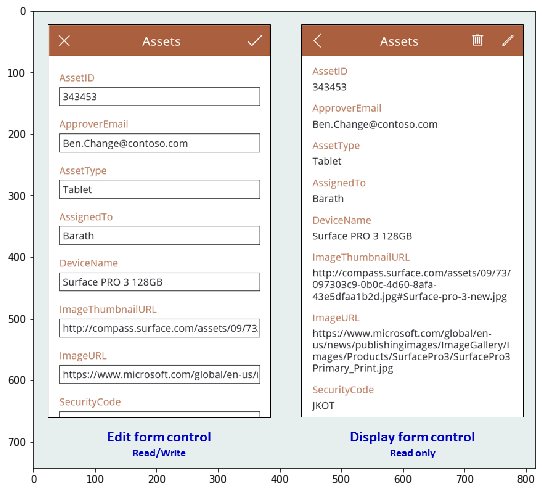

In [10]:
# [load_image]
argv="i1.png"
    # Check number of arguments
print(len(argv))
if len(argv) < 1:
    print ('Not enough parameters')
    print ('Usage:\nmorph_lines_detection.py < path_to_image >')
    
 # Load the image
src = cv.imread(argv, cv.IMREAD_COLOR)
 # Check if image is loaded fine
if src is None:
    print ('Error opening image: ' + argv[0])
# Show source image
plt.imshow(src)
 # [load_image]
    # [gray]
    # Transform source image to gray if it is not already    
 

In [11]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

from ocr.helpers import implt, resize, ratio

%matplotlib inline
plt.rcParams['figure.figsize'] = (9.0, 9.0)

In [12]:
IMG = "final4.jpeg"    # Image name/number

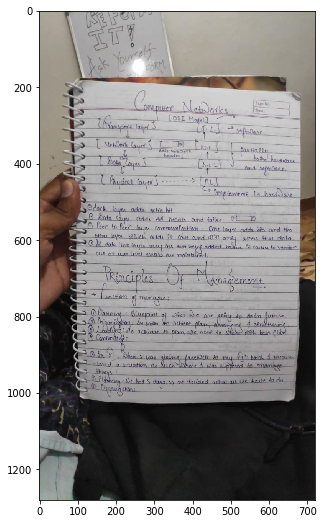

In [13]:
# Loading images and ploting it (converting to RGB from BGR)
image = cv2.cvtColor(cv2.imread("%s" % IMG), cv2.COLOR_BGR2RGB)
plt.imshow(image) 

In [14]:
def edges_det(img, min_val, max_val):
    """ Preprocessing (gray, thresh, filter, border) + Canny edge detection """
    img = cv2.cvtColor(resize(img), cv2.COLOR_BGR2GRAY)

    # Applying blur and threshold
    img = cv2.bilateralFilter(img, 9, 75, 75)
    img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 115, 4)
    implt(img, 'gray', 'Adaptive Threshold')

    # Median blur replace center pixel by median of pixels under kelner
    # => removes thin details
    img = cv2.medianBlur(img, 11)

    # Add black border - detection of border touching pages
    # Contour can't touch side of image
    img = cv2.copyMakeBorder(img, 5, 5, 5, 5, cv2.BORDER_CONSTANT, value=[0, 0, 0])
    implt(img, 'gray', 'Median Blur + Border')

    return cv2.Canny(img, min_val, max_val)

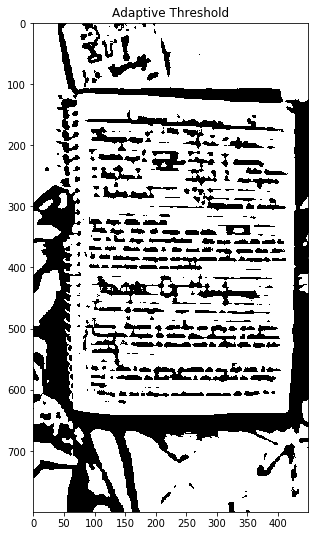

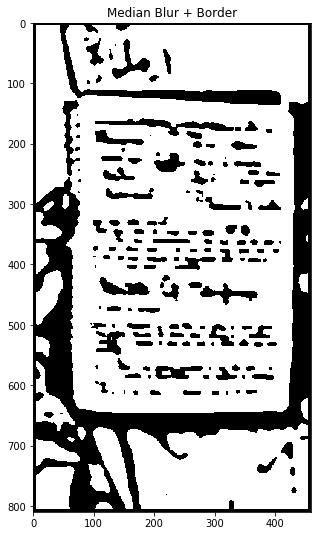

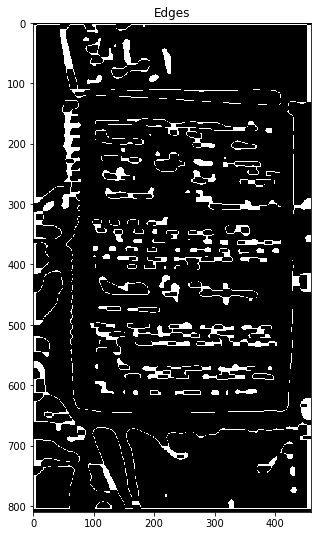

In [15]:
# Edge detection ()
edges_image = edges_det(image, 200, 250)

# Close gaps between edges (double page clouse => rectangle kernel)
edges_image = cv2.morphologyEx(edges_image, cv2.MORPH_CLOSE, np.ones((5, 11)))
implt(edges_image, 'gray', 'Edges')

In [16]:
def four_corners_sort(pts):
    """ Sort corners: top-left, bot-left, bot-right, top-right"""
    diff = np.diff(pts, axis=1)
    summ = pts.sum(axis=1)
    return np.array([pts[np.argmin(summ)],
                     pts[np.argmax(diff)],
                     pts[np.argmax(summ)],
                     pts[np.argmin(diff)]])


def contour_offset(cnt, offset):
    """ Offset contour because of 5px border """
    cnt += offset
    cnt[cnt < 0] = 0
    return cnt


def find_page_contours(edges, img):
    """ Finding corner points of page contour """
    # Getting contours  
    contours, hierarchy = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    # Finding biggest rectangle otherwise return original corners
    height = edges.shape[0]
    width = edges.shape[1]
    MIN_COUNTOUR_AREA = height * width * 0.5
    MAX_COUNTOUR_AREA = (width - 10) * (height - 10)

    max_area = MIN_COUNTOUR_AREA
    page_contour = np.array([[0, 0],
                            [0, height-5],
                            [width-5, height-5],
                            [width-5, 0]])

    for cnt in contours:
        perimeter = cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, 0.03 * perimeter, True)

        # Page has 4 corners and it is convex
        if (len(approx) == 4 and
                cv2.isContourConvex(approx) and
                max_area < cv2.contourArea(approx) < MAX_COUNTOUR_AREA):
            
            max_area = cv2.contourArea(approx)
            page_contour = approx[:, 0]

    # Sort corners and offset them
    page_contour = four_corners_sort(page_contour)
    return contour_offset(page_contour, (-5, -5))

PAGE CONTOUR:
[[  0   0]
 [ 66 629]
 [413 636]
 [454   0]]


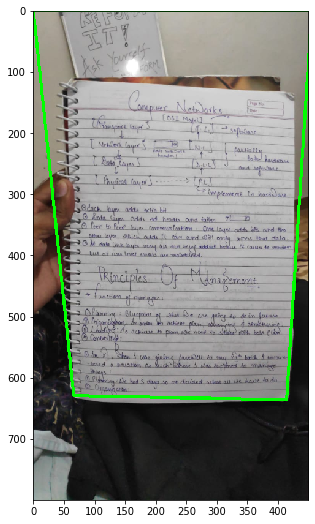

In [17]:
page_contour = find_page_contours(edges_image, resize(image))
print("PAGE CONTOUR:")
print(page_contour)
implt(cv2.drawContours(resize(image), [page_contour], -1, (0, 255, 0), 3))

       
# Recalculate to original scale
page_contour = page_contour.dot(ratio(image))

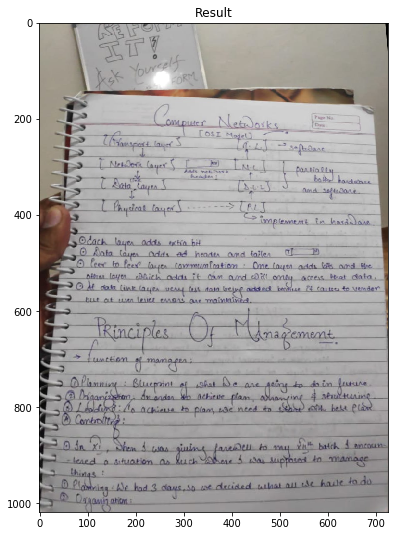

True

In [18]:
def persp_transform(img, s_points):
    """ Transform perspective from start points to target points """
    # Euclidean distance - calculate maximum height and width
    height = max(np.linalg.norm(s_points[0] - s_points[1]),
                 np.linalg.norm(s_points[2] - s_points[3]))
    width = max(np.linalg.norm(s_points[1] - s_points[2]),
                 np.linalg.norm(s_points[3] - s_points[0]))
    
    # Create target points
    t_points = np.array([[0, 0],
                        [0, height],
                        [width, height],
                        [width, 0]], np.float32)
    
    # getPerspectiveTransform() needs float32
    if s_points.dtype != np.float32:
        s_points = s_points.astype(np.float32)
    
    M = cv2.getPerspectiveTransform(s_points, t_points) 
    return cv2.warpPerspective(img, M, (int(width), int(height)))
    
    
newImage = persp_transform(image, page_contour)
implt(newImage, t='Result')
# Saving the result. Yay! (don't forget to convert colors bact to BGR)	
cv2.imwrite("resultImage.jpg", cv2.cvtColor(newImage, cv2.COLOR_BGR2RGB))

In [9]:
!pip install imutils


In [12]:
# import the necessary packages
from imutils.perspective import four_point_transform
from imutils import contours
import numpy as np
import argparse
import imutils
import cv2



# define the answer key which maps the question number
# to the correct answer
ANSWER_KEY = {0: 1, 1: 4, 2: 0, 3: 3, 4: 1}

# load the image, convert it to grayscale, blur it
# slightly, then find edges
image = cv2.imread("test.png")
#print(image)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 75, 200)
#print(type(edged))
# find contours in the edge map, then initialize
# the contour that corresponds to the document
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = cv2.grab_contours(cnts)

docCnt = None

# ensure that at least one contour was found
if len(cnts) > 0:
	# sort the contours according to their size in
	# descending order
	cnts = sorted(cnts, key=cv2.contourArea, reverse=True)

	# loop over the sorted contours
	for c in cnts:
		# approximate the contour
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.02 * peri, True)
		# if our approximated contour has four points,
		# then we can assume we have found the paper
		if len(approx) == 4:
			docCnt = approx
			break

# apply a four point perspective transform to both the
# original image and grayscale image to obtain a top-down
# birds eye view of the paper
implt(image)
paper = four_point_transform(image, docCnt.reshape(4, 2))
warped = four_point_transform(gray, docCnt.reshape(4, 2))
implt(paper)
cv2.imwrite("resultImage.jpg", cv2.cvtColor(paper, cv2.COLOR_BGR2RGB))


AttributeError: module 'cv2.cv2' has no attribute 'grab_contours'

In [20]:
import numpy as np
import cv2 as cv
img = cv.imread('resultImage.jpg',0)
ret,thresh = cv.threshold(img,127,255,0)
contours,hierarchy = cv.findContours(thresh, 1, 2)

cnt = contours[0]
M = cv.moments(cnt)
print( M )
x,y,w,h = cv.boundingRect(cnt)
cv.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
print(h,w)

{'m00': 2.0, 'm10': 86.0, 'm01': 354.0, 'm20': 3698.333333333333, 'm11': 15222.0, 'm02': 62658.33333333333, 'm30': 159057.0, 'm21': 654605.0, 'm12': 2694308.3333333335, 'm03': 11090643.0, 'mu20': 0.33333333333303017, 'mu11': 0.0, 'mu02': 0.3333333333284827, 'mu30': 2.9103830456733704e-11, 'mu21': 5.3660187404602766e-11, 'mu12': 3.637978807091713e-10, 'mu03': 1.862645149230957e-09, 'nu20': 0.08333333333325754, 'nu11': 0.0, 'nu02': 0.08333333333212067, 'nu30': 5.1448789686149945e-12, 'nu21': 9.485870598383896e-12, 'nu12': 6.431098710768743e-11, 'nu03': 3.2927225399135965e-10}
3 3


In [1]:
import cv2
import numpy as np

img = cv2.imread('final.jpeg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
implt(img)
cv2.imwrite('contour.jpg',img)

NameError: name 'implt' is not defined

9


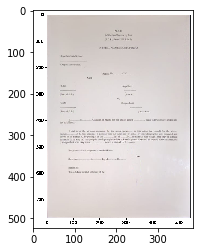

In [16]:
# [load_image]
argv="test2.png"
    # Check number of arguments
print(len(argv))
if len(argv) < 1:
    print ('Not enough parameters')
    print ('Usage:\nmorph_lines_detection.py < path_to_image >')
    
 # Load the image
src = cv2.imread(argv, cv2.IMREAD_COLOR)
 # Check if image is loaded fine
if src is None:
    print ('Error opening image: ' + argv[0])
# Show source image
plt.imshow(src)
 # [load_image]
    # [gray]
    # Transform source image to gray if it is not already    
 

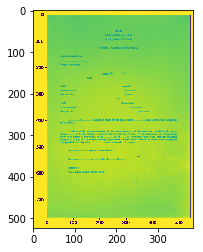

In [17]:

if len(src.shape) != 2:
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
else:
    gray = src
    # Show gray image
plt.imshow(gray)
   

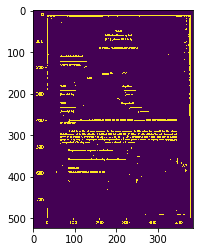

In [18]:
 # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv2.bitwise_not(gray)
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, \
                                cv2.THRESH_BINARY, 15, -2)
    # Show binary image
plt.imshow(bw)
    

Number of lines: 1


True

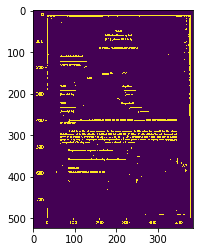

In [19]:
ret, thresh = cv2.threshold(bw, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

_,contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print('Number of lines:', len(contours))
img = cv2.drawContours(bw, contours, -1, (0,255,0), 3)
plt.imshow(img)
cv2.imwrite('gray1.png',img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


True

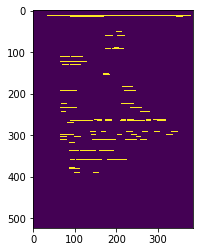

In [20]:
import cv2 as cv
# [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)

#plt.imshow(horizontal)

vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)

plt.imshow(horizontal)

horizontal = cv.dilate(horizontal, horizontalStructure)
print(horizontal)
plt.imshow(horizontal)
cv2.imwrite('hor.png',horizontal)

Above image is of a form


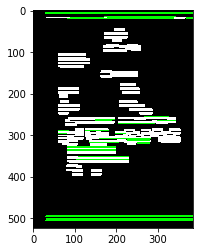

In [15]:
import cv2
import numpy as np
from functools import reduce

def Average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst) 

img = cv2.i
mread('hor.png')

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 1
maxLineGap = 0
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)


x1list=[]
x2list=[]
diff=[]
for i in range(0,len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        x1list.append(x1)
        x2list.append(x2)
        diff.append(x2-x1)
plt.imshow(img)
avg=Average(diff)

countdiff=[]
diffindiff=[]
for x in diff:
    countdiff.append(diff.count(x))
    
for x in range(len(diff)-1):
    diffindiff.append(abs(diff[x+1]-diff[x]))

diffindiff.sort()
    

cv2.imwrite('houghlines5.jpg',img)
count=0
for x in countdiff:
    if x>2:
        count=count+1
if count>0:
    print("Above image is of a form")
elif min(diffindiff)<10:
    print("Above image is of a form")
else:
    print("Not a form")

In [28]:
from PIL import Image
import sys

import pyocr
import pyocr.builders

In [29]:
!pip install pyocr

In [30]:
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[1]
print("Will use lang '%s'" % (lang))


Will use tool 'Tesseract (sh)'
Available languages: osd, eng
Will use lang 'eng'


In [31]:
txt = tool.image_to_string(
    Image.open('final4.jpeg'),
    lang=lang,
    builder=pyocr.builders.TextBuilder()
)

print(txt)

i

Uy Ue

j

       
   
      
      
      
      

 

 

Lh
=

ewudube

Naver odats

 

 

Layer Odds 2

 

   

eptint_of shat Meaney do

or» dn gadan Wo Achiewe plans oWanerii ing
WE: L's Achieve tn plan, ude need ty bbe) eh bes Clee

 

    

 

Shem 4 puna giunlane, face eu foamy tui batch 4 amcor:
ostuation On Kuch Nene 4 sins supneedt to omadinge

   

ldwting be had 3 cages ae decided usar ou ite haste toda
Na sation:


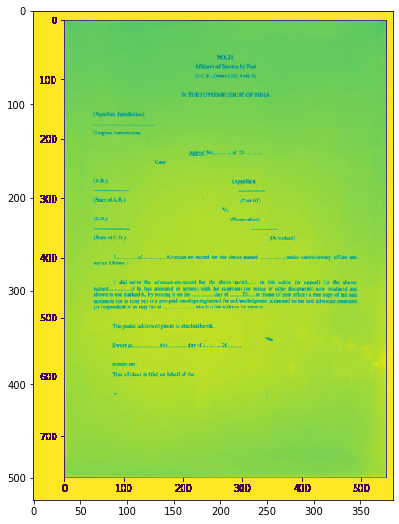

In [32]:

if len(src.shape) != 2:
    gray = cv.cvtColor(src, cv.COLOR_BGR2GRAY)
else:
    gray = src
    # Show gray image
plt.imshow(gray)
   

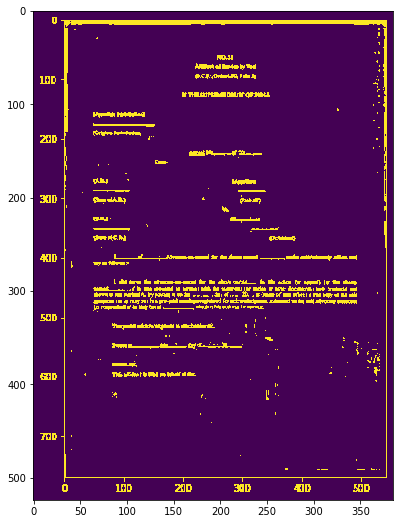

In [33]:
 # [gray]
    # [bin]
    # Apply adaptiveThreshold at the bitwise_not of gray, notice the ~ symbol
gray = cv.bitwise_not(gray)
bw = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 15, -2)
    # Show binary image
plt.imshow(bw)
    

[array([[[  0,   0]],

       [[  0, 523]],

       [[384, 523]],

       [[384,   0]]], dtype=int32)]
Number of lines: 1


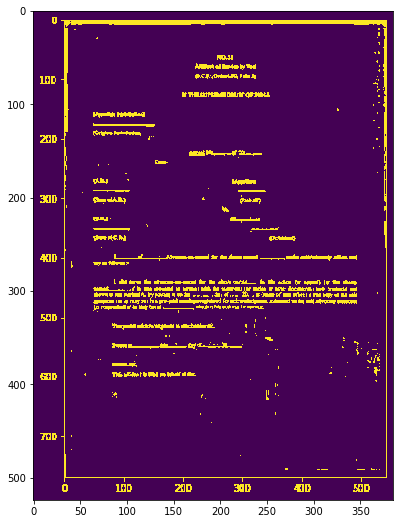

In [34]:
ret, thresh = cv2.threshold(bw, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
print('Number of lines:', len(contours))
img = cv2.drawContours(bw, contours, -1, (0,255,0), 3)
plt.imshow(img)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


True

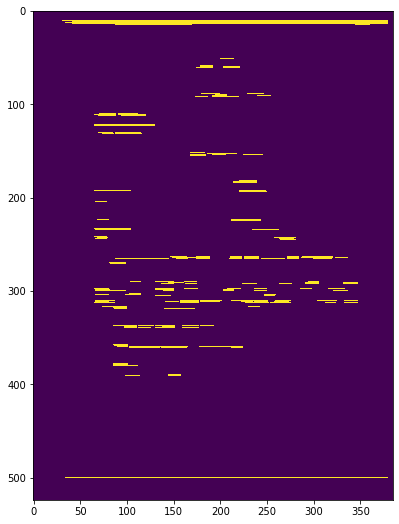

In [35]:
# [bin]
    # [init]
    # Create the images that will use to extract the horizontal and vertical lines
horizontal = np.copy(bw)

#plt.imshow(horizontal)

vertical = np.copy(bw)
    # [init]
    # [horiz]
    # Specify size on horizontal axis
cols = horizontal.shape[1]
horizontal_size = cols // 30
    # Create structure element for extracting horizontal lines through morphology operations
horizontalStructure = cv.getStructuringElement(cv.MORPH_RECT, (horizontal_size, 1))
    # Apply morphology operations
horizontal = cv.erode(horizontal, horizontalStructure)

plt.imshow(horizontal)

horizontal = cv.dilate(horizontal, horizontalStructure)
print(horizontal)
plt.imshow(horizontal)
cv2.imwrite('horizontal.jpg',horizontal)

-1000 999 9 10


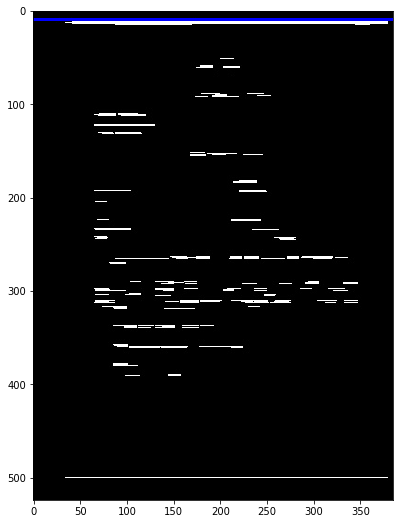

In [36]:
import cv2
import numpy as np

img = cv2.imread('horizontal.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    print(x1,x2,y1,y2)
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('houghlines3.jpg',img)
plt.imshow(img)

13
76.53846153846153
[336, 200, 171, 11, 9, 54, 55, 8, 80, 2, 16, 3, 50]
[1, 2, 13, 14, 29, 45, 47, 47, 72, 78, 136, 160]
Above image is of a form


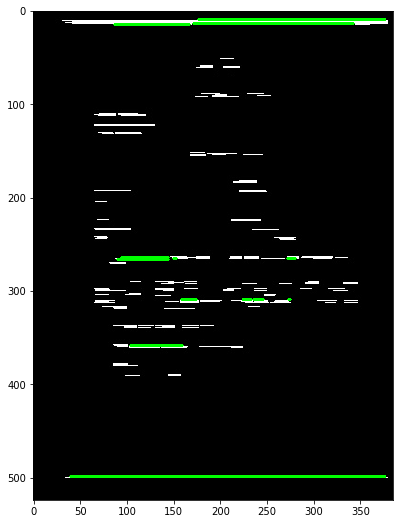

In [37]:
import cv2
import numpy as np
from functools import reduce

def Average(lst): 
    return reduce(lambda a, b: a + b, lst) / len(lst) 

img = cv2.imread('horizontal.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 1
maxLineGap = 0
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)

print(len(lines))
x1list=[]
x2list=[]
diff=[]
for i in range(0,len(lines)):
    for x1,y1,x2,y2 in lines[i]:
        cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)
        x1list.append(x1)
        x2list.append(x2)
        diff.append(x2-x1)
plt.imshow(img)
avg=Average(diff)
print(avg)
print(diff)
countdiff=[]
diffindiff=[]
for x in diff:
    countdiff.append(diff.count(x))
    
for x in range(len(diff)-1):
    diffindiff.append(abs(diff[x+1]-diff[x]))

diffindiff.sort()
    
print(diffindiff)
cv2.imwrite('houghlines5.jpg',img)
count=0
for x in countdiff:
    if x>2:
        count=count+1
if count>0:
    print("Above image is of a form")
elif min(diffindiff)<10:
    print("Above image is of a form")
else:
    print("Not a form")

In [38]:
from PIL import Image
import sys

import pyocr
import pyocr.builders


In [39]:
tools = pyocr.get_available_tools()
if len(tools) == 0:
    print("No OCR tool found")
    sys.exit(1)
# The tools are returned in the recommended order of usage
tool = tools[0]
print("Will use tool '%s'" % (tool.get_name()))
# Ex: Will use tool 'libtesseract'

langs = tool.get_available_languages()
print("Available languages: %s" % ", ".join(langs))
lang = langs[1]
print("Will use lang '%s'" % (lang))


Will use tool 'Tesseract (sh)'
Available languages: osd, eng
Will use lang 'eng'


In [40]:
txt = tool.image_to_string(
    Image.open('i1.png'),
    lang=lang,
    builder=pyocr.builders.TextBuilder()
)

print(txt)

AssetID

 

343453

 

ApproverEmail

Ben.Change@contoso.com

 

AssetType

 

Tablet

 

AssignedTo

 

Barath

 

DeviceName

 

Surface PRO 3 128GB

 

ImageThumbnailURL

 

http://compass.surface.com/assets/09/73.

 

ImageURL

 

 

 

https://www.microsoft.com/global/en-us/|

 

SecurityCode

 

AssetID
343453

Approverémail
Ben.Change@contoso.com

AssetType
Tablet

AssignedTo
Barath

DeviceName
Surface PRO 3 128GB

ImageThumbnailURL

http://compass.surface.com/assets/09/73/
097303c9-0b0c-4d60-8afa-

43e5dfaa1b2d.jpg#Surface-pro-3-new.jpg

ImageURL

https://www.microsoft.com/global/en-
us/news/publishingimages/ImageGallery/
mages/Products/SurfacePro3/SurfacePro3
Primary_Print.jpg

SecurityCode
JKOT

 

 

Edit form control
Read/Write

Display form control
Read only


In [41]:
from skimage import measure
labels = measure.label(horizontal)
print(labels)
print(len(labels[0]))
print(labels.max())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
385
85


In [42]:
!pip install scikit-image

[array([[[  0,   0]],

       [[  0, 523]],

       [[384, 523]],

       [[384,   0]]], dtype=int32)]
Number of lines: 1


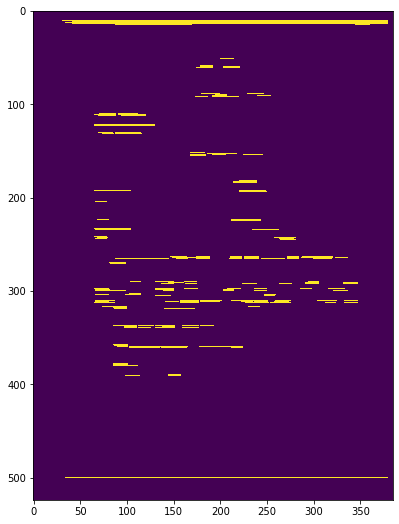

In [43]:
ret, thresh = cv2.threshold(horizontal, 80, 255, cv2.THRESH_BINARY_INV)
plt.imshow(thresh)

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)
print('Number of lines:', len(contours))
plt.imshow(horizontal)

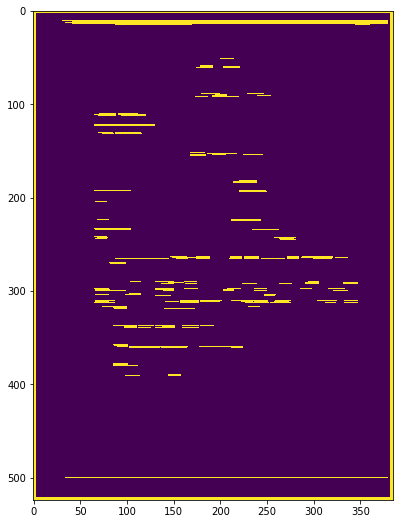

In [44]:
im = cv2.drawContours(horizontal, contours, -1, (255,255,255), 3)
plt.imshow(im)

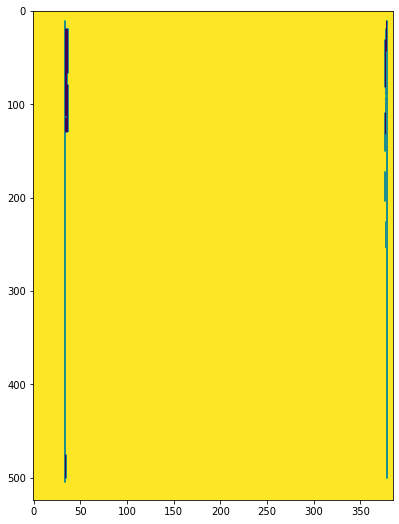

In [45]:
# Show extracted horizontal lines
   # show_wait_destroy("horizontal", horizontal)
    # [horiz]
    # [vert]
    # Specify size on vertical axis
rows = vertical.shape[0]
verticalsize = rows // 30
    # Create structure element for extracting vertical lines through morphology operations
verticalStructure = cv.getStructuringElement(cv.MORPH_RECT, (1, verticalsize))
    # Apply morphology operations
vertical = cv.erode(vertical, verticalStructure)
vertical = cv.dilate(vertical, verticalStructure)
    # Show extracted vertical lines
    #show_wait_destroy("vertical", vertical)
    # [vert]
    # [smooth]
    # Inverse vertical image
vertical = cv.bitwise_not(vertical)
    #show_wait_destroy("vertical_bit", vertical)

    
    # Step 1
edges = cv.adaptiveThreshold(vertical, 255, cv.ADAPTIVE_THRESH_MEAN_C, \
                                cv.THRESH_BINARY, 3, -2)
    #show_wait_destroy("edges", edges)
    # Step 2
kernel = np.ones((2, 2), np.uint8)
edges = cv.dilate(edges, kernel)
    #show_wait_destroy("dilate", edges)
    # Step 3
smooth = np.copy(vertical)
    # Step 4
smooth = cv.blur(smooth, (2, 2))
    # Step 5
(rows, cols) = np.where(edges != 0)
vertical[rows, cols] = smooth[rows, cols]
    # Show final result
plt.imshow(vertical)
    # [smooth]
